In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [2]:
# Load dataset
dataset = pd.read_csv('customers.csv')

# Selecting features for clustering
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
wcss = []
silhouette_scores = []
for n_clusters in range(1, 11):
      kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
      kmeans.fit(X_scaled)
      wcss.append(kmeans.inertia_)
if n_clusters > 1:
       silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
       silhouette_scores.append(silhouette_avg)

In [4]:
# Debugging: Print the silhouette scores
print("Silhouette Scores:", silhouette_scores)

Silhouette Scores: [0.4431713026508046]


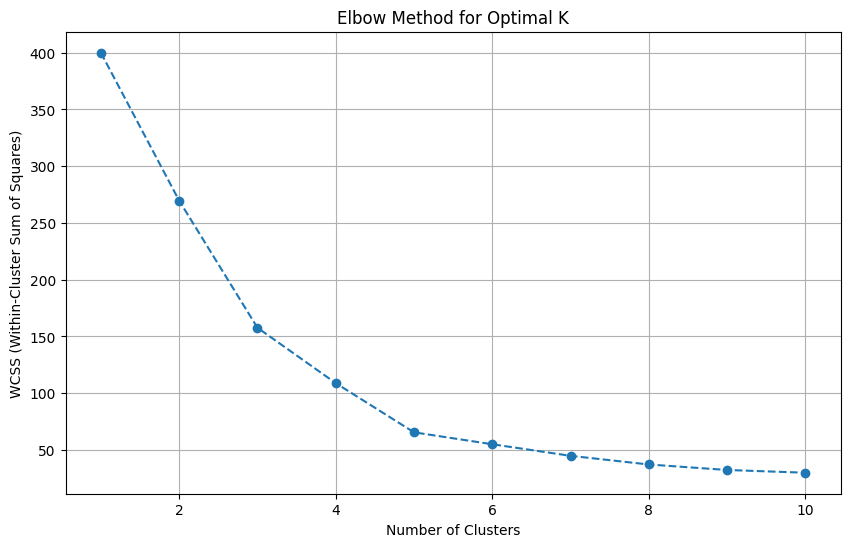

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

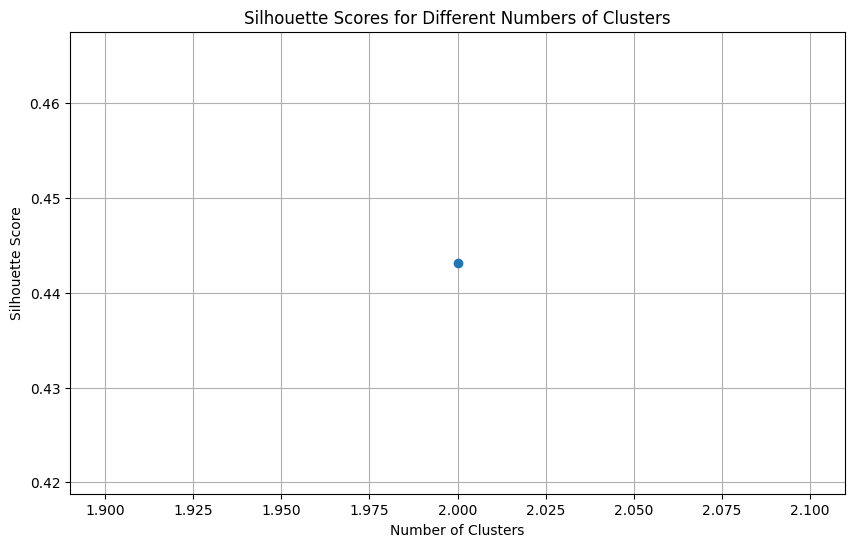

In [6]:
# Visualizing the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, len(silhouette_scores) + 2), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.grid()
plt.show()

In [7]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

# Compute Silhouette score with optimal K
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score for {optimal_k} clusters: {silhouette_avg}")


Silhouette Score for 5 clusters: 0.5546571631111091


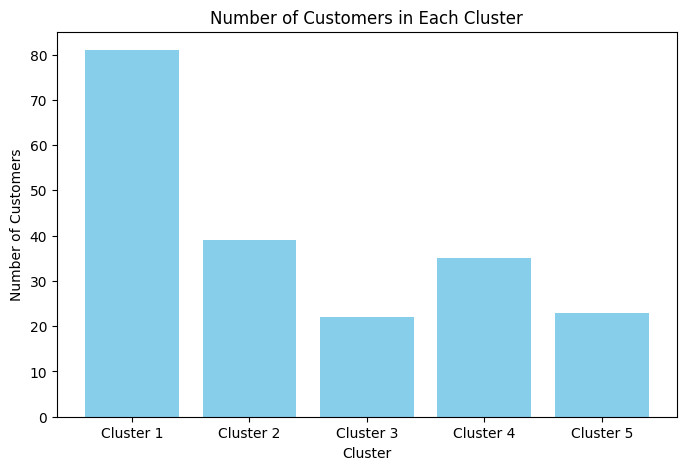

In [8]:
cluster_counts = np.bincount(y_kmeans)
plt.figure(figsize=(8, 5))
plt.bar(range(len(cluster_counts)), cluster_counts, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Each Cluster')
plt.xticks(range(len(cluster_counts)), [f'Cluster {i+1}' for i in range(len(cluster_counts))])
plt.show()


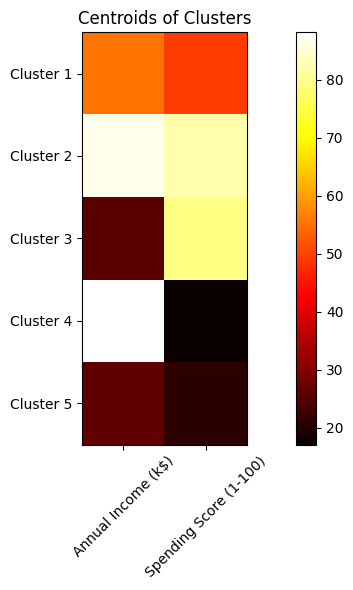

In [9]:
# Inverse transform centroids to original scale
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 6))
plt.imshow(centroids, interpolation='nearest', cmap='hot')
plt.colorbar()
plt.title('Centroids of Clusters')
plt.xticks(range(X.shape[1]), dataset.columns[3:5], rotation=45)
plt.yticks(range(len(centroids)), [f'Cluster {i+1}' for i in range(len(centroids))])
plt.tight_layout()
plt.show()


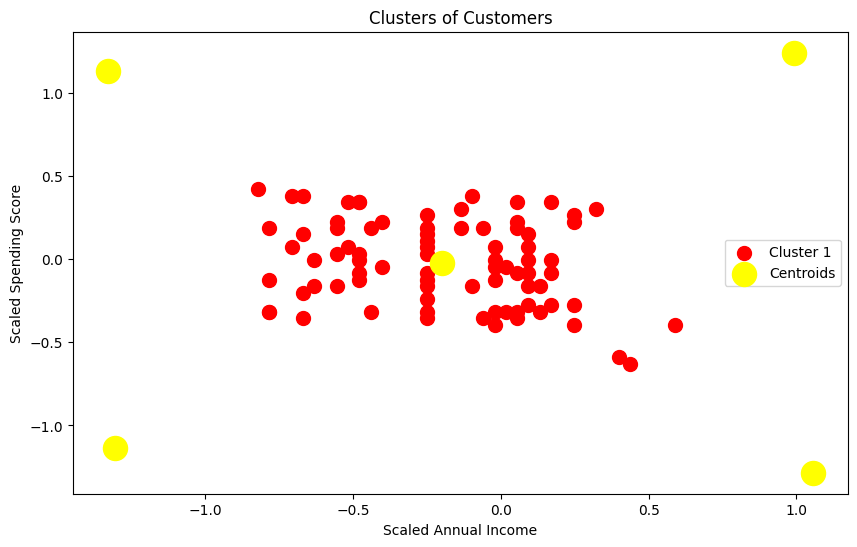

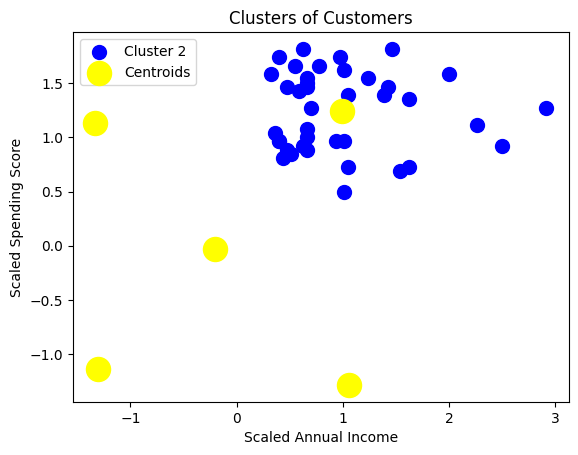

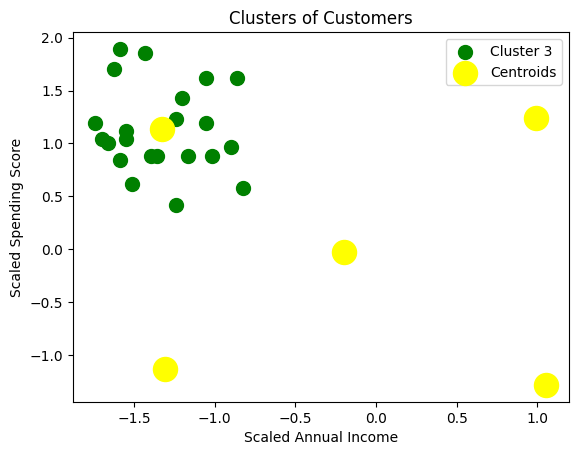

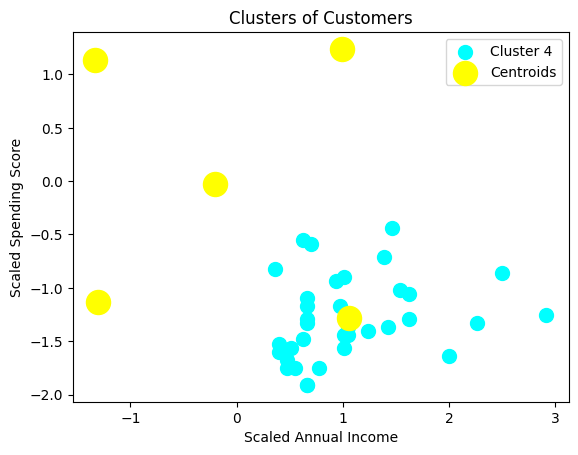

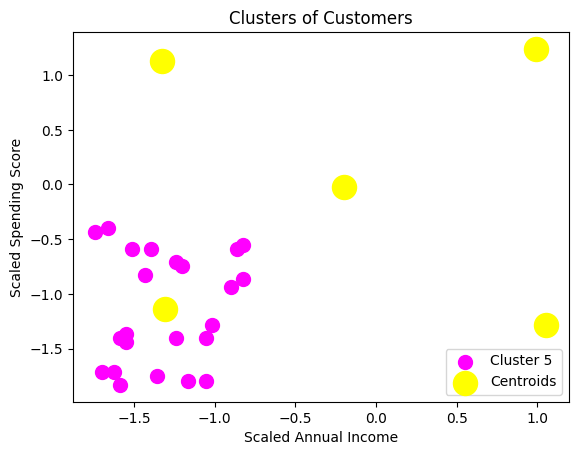

In [10]:
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(optimal_k):
    plt.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1], s=100, c=colors[i], label=f'Cluster {i+1}')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
    plt.xlabel('Scaled Annual Income')
    plt.ylabel('Scaled Spending Score')
    plt.title('Clusters of Customers')
    plt.legend()
    plt.show()
